In [ ]:
import torch
from fastseg import MobileV3Small

model = MobileV3Small(num_classes=3)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.load_state_dict(torch.load("C:\\Users\\omer\\Desktop\\Lane detection\\fastai_model.pth",  map_location=device))
model.eval()

In [90]:
model= torch.load("C:\\Users\\omer\\Desktop\\Lane detection\\fastai_model.pth",  map_location=device)

In [107]:
model.eval()

MobileV3Small(
  (trunk): MobileNetV3_Small(
    (early): Sequential(
      (0): Conv2dSame(3, 16, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): HardSwishMe()
    )
    (block0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2dSame(16, 16, kernel_size=(3, 3), stride=(2, 2), groups=16, bias=False)
        (bn1): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): ReLU(inplace=True)
          (conv_expand): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    

In [91]:
img[:,:,0:1].shape

(512, 1024, 1)

In [148]:

from fastai.vision.all import *
import cv2
img = cv2.imread(str(get_image_files('C:\\Users\\omer\\Desktop\\Lane detection\\test_video')[1]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def get_pred_for_mobilenet(model, img_array):
    with torch.no_grad():
        image_tensor = img_array.transpose(2,0,1).astype('float32')/255
        x_tensor = torch.from_numpy(image_tensor).unsqueeze(0)
        model_output = F.softmax( model.forward(x_tensor), dim=1 ).cpu().numpy()
    return model_output
model.eval();


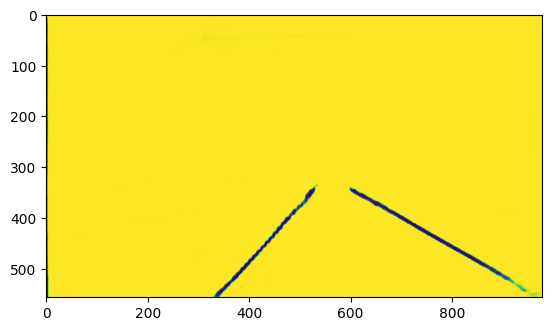

In [149]:
plt.imshow(get_pred_for_mobilenet(model,img)[0][0])

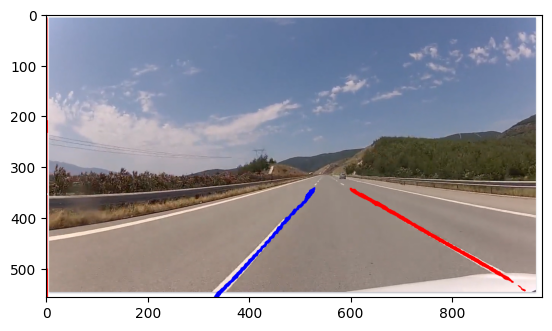

In [150]:
import copy
back, left, right = get_pred_for_mobilenet(model,img)[0]
def ld_detection_overlay(image, left_mask, right_mask):
    res = copy.copy(image)
    res[left_mask > 0.3, :] = [0,0,255]
    res[right_mask > 0.3, :] = [255,0,0]
    return res
plt.imshow(ld_detection_overlay(img, left, right))

In [151]:
%timeit get_pred_for_mobilenet(model,img)

370 ms ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [153]:
from torchsummary import summary
summary(model,input_size=(3,1024,720))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dSame-1         [-1, 16, 512, 360]             432
       BatchNorm2d-2         [-1, 16, 512, 360]              32
       HardSwishMe-3         [-1, 16, 512, 360]               0
        Conv2dSame-4         [-1, 16, 256, 180]             144
       BatchNorm2d-5         [-1, 16, 256, 180]              32
              ReLU-6         [-1, 16, 256, 180]               0
            Conv2d-7              [-1, 8, 1, 1]             136
              ReLU-8              [-1, 8, 1, 1]               0
            Conv2d-9             [-1, 16, 1, 1]             144
    SqueezeExcite-10         [-1, 16, 256, 180]               0
           Conv2d-11         [-1, 16, 256, 180]             256
      BatchNorm2d-12         [-1, 16, 256, 180]              32
         Identity-13         [-1, 16, 256, 180]               0
DepthwiseSeparableConv-14         [-1, 